In [1]:
import openpathsampling as paths
import octomore
import math
import numpy as np

In [2]:
DFG_Abl_sim = octomore.DFG(output_file="DFG_Abl.nc", kinase=octomore.Abl)

In [3]:
DFG_Abl_sim.dfg(DFG_Abl_sim.engine.template)

array(-2.5777428150177, dtype=float32)

In [4]:
interfaces = paths.VolumeFactory.CVRangeVolumePeriodicSet(DFG_Abl_sim.cv, 
                                                          minvals=-4, 
                                                          maxvals=list(-2.6 + 0.1*np.arange(26)),
                                                          period_min=-math.pi, period_max=math.pi)

In [5]:
ratcheter = DFG_Abl_sim.ratcheter(interfaces, direction="out_in")

In [6]:
import logging.config
logging.config.fileConfig("logging.conf", disable_existing_loggers=False)

In [7]:
gs = ratcheter.run(20)

Working on Bootstrapping cycle step 134 in ensemble 12/26 .



ValueError: Some coordinates became 'nan'; simulation is unstable or buggy.

In [ ]:
DFG_Abl_sim.engine.platform

In [ ]:
gs

In [ ]:
gs.samples

In [ ]:
for s in gs:
    print s

In [9]:
ntraj = len(DFG_Abl_sim.storage.trajectories)
print ntraj

134


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

[-21946.580078125, -21340.259765625, -21340.259765625, -21340.259765625, -21340.259765625, -21281.27734375, -21177.82421875, -19728.0078125, -21129.265625, -20967.1015625, -21270.337890625, -21270.337890625, -21270.337890625, -21270.337890625, -21270.337890625, -21193.767578125, -20961.9609375, -21092.919921875, -20989.916015625, -20014.509765625, -19977.560546875, -19977.560546875, -19977.560546875, -20081.5859375, -18482.4296875, -18624.939453125, -18624.939453125, -16014.921875, -15990.1728515625, -18624.939453125, -19195.29296875, -18233.01171875, -18233.01171875, -17750.96875, -18233.01171875, -18233.01171875, -18200.125, -17845.228515625, -18200.125, -17816.15625, -17852.1796875, -15349.0087890625, -17852.1796875, -17852.1796875, -15894.0087890625, -17741.02734375, -17669.328125, -17709.34375, -15797.1650390625, -15953.5146484375, -17669.328125, -17874.212890625, -17874.212890625, -17874.212890625, -17874.212890625, -17644.3828125, -17510.314453125, -17874.212890625, -15378.76171

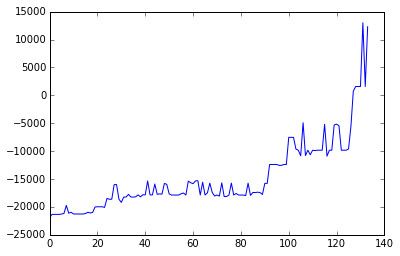

In [11]:
energies = []

for traj in DFG_Abl_sim.storage.trajectories:
    energies.append( np.max([s.configuration.potential_energy/(s.configuration.potential_energy.unit) for s in traj]) )
print energies
plt.plot(energies)

In [12]:
import mdtraj as md
this_guy = traj.md()
this_guy.save_pdb('test_2p7.pdb')

In [13]:
for snap in traj:
    print snap.configuration.potential_energy

8061.33300781 kJ/mol
12293.7617188 kJ/mol
7369.33203125 kJ/mol
1521.63098145 kJ/mol
1581.21875 kJ/mol


[array([-2.92089176, -2.6470561 , -2.39971113, -2.53390169, -2.7248466 ], dtype=float32), array([-2.73540354, -2.6470561 , -2.39971113, -2.53390169, -2.7248466 ], dtype=float32), array([-2.73540354, -2.6470561 , -2.39971113, -2.53390169, -2.74503565], dtype=float32), array([-2.73540354, -2.6470561 , -2.39971113, -2.61889172, -2.99474263], dtype=float32), array([-2.73540354, -2.6470561 , -2.39971113, -2.61889172, -2.84478688], dtype=float32), array([-2.731915  , -2.61844587, -2.47406483, -2.61889172, -2.84478688], dtype=float32), array([-2.98492265, -2.59918904, -2.6959672 , -2.6470561 , -2.39971113,
       -2.61889172, -2.84478688], dtype=float32), array([-2.98492265, -2.59918904, -2.6959672 , -2.84888148], dtype=float32), array([-2.70414472, -2.44057012, -2.39971113, -2.61889172, -2.84478688], dtype=float32), array([-2.70805001, -2.5053196 , -2.39971113, -2.61889172, -2.84478688], dtype=float32), array([-2.77173567, -2.39971113, -2.61889172, -2.84478688], dtype=float32), array([-2.771

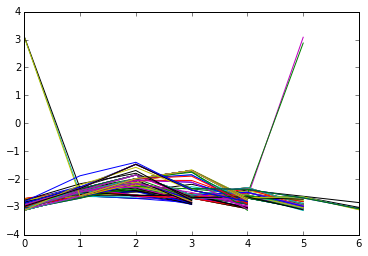

In [16]:
collective_variable = []

for traj in DFG_Abl_sim.storage.trajectories:
    collective_variable.append( DFG_Abl_sim.cv(traj) )
print collective_variable
for cv in collective_variable:
    plt.plot(cv)

0 2.39971
1 2.39971
2 2.39971
3 2.39971
4 2.39971
5 2.47406
6 2.39971
7 2.59919
8 2.39971
9 2.39971
10 2.39971
11 2.39971
12 2.39971
13 2.39971
14 2.39971
15 2.39971
16 2.27604
17 2.27604
18 2.1711
19 2.11465
20 2.12533
21 2.12533
22 2.12533
23 2.12533
24 2.12533
25 2.12533
26 2.12533
27 2.32332
28 2.24968
29 2.12533
30 2.15759
31 2.15759
32 2.15759
33 2.22106
34 2.15759
35 2.15759
36 2.15759
37 2.2788
38 2.15759
39 2.15759
40 2.15759
41 2.31911
42 2.15759
43 2.15759
44 2.20958
45 2.15759
46 2.15759
47 2.20346
48 2.18932
49 2.26668
50 2.15759
51 2.15759
52 2.15759
53 2.15759
54 2.15759
55 2.4335
56 2.45313
57 2.15759
58 2.40633
59 2.31067
60 2.33915
61 2.48116
62 2.32533
63 2.15759
64 2.36049
65 2.15759
66 2.25877
67 2.32315
68 2.25603
69 2.32272
70 2.15759
71 2.15759
72 2.40176
73 2.15759
74 2.15759
75 2.15759
76 2.57023
77 2.15759
78 2.26636
79 2.15759
80 2.15759
81 2.29684
82 2.15759
83 2.4582
84 2.14333
85 2.10395
86 2.10395
87 2.10395
88 2.10395
89 2.10395
90 2.10395
91 2.10395
92

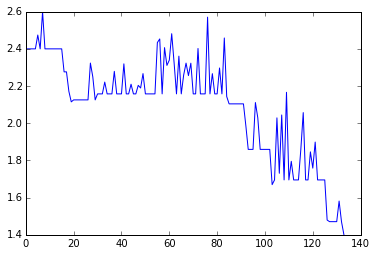

In [23]:

results = [min(abs(DFG_Abl_sim.cv(traj))) for traj in DFG_Abl_sim.storage.trajectories]
for i in range(len(results)):
    print i, results[i]

plt.plot(results)

In [54]:
snap
new_traj = DFG_Abl_sim.engine.generate(snap, running=[paths.LengthEnsemble(100).can_append])

In [56]:
DFG_Abl_sim.cv(new_traj)

array([-2.8764081 ,  3.00907397, -3.11281276, -2.81744862, -2.69137192,
       -2.95594239, -2.97627425, -2.4548049 , -2.37856293,  3.12754416,
       -2.5401547 , -2.35821223,  3.122926  ,  3.09253454, -2.72293282,
        3.13563681, -3.13932323, -2.87942863,  3.12046695, -3.09436941,
       -2.90722132, -2.66860628, -2.99571681, -3.06409144, -2.71161723,
       -2.33481169, -2.77323723, -3.11893082, -2.98092318,  3.06958699,
        2.79712152, -3.07363129, -3.10199666, -2.75989962, -3.0717423 ,
        3.10160041, -2.9720993 , -2.87695861, -3.14022517, -3.076442  ,
       -2.57668233, -2.99893332, -2.95961976, -2.87520099, -2.90741706,
       -3.09433818, -2.61057043, -3.05161881, -2.936589  ,  3.12959552,
       -3.01408362, -2.62192297, -2.74021173, -2.99403739, -2.60598779,
       -2.80568767, -3.03379655, -2.83106017, -2.83528471, -2.96829295,
       -2.74693751, -3.10673356,  3.07889795, -2.74219537, -2.41930318,
       -2.55543613, -2.85753155, -2.47495222, -2.81832862, -2.72

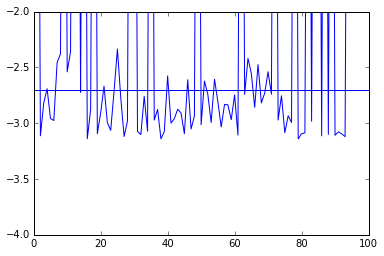

In [91]:
plt.plot(DFG_Abl_sim.cv(traj))
plt.ylim([-4,-2])
plt.axhline(-2.7)

(array([ 39.,  21.,  10.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   5.,  19.]),
 array([ -3.14098263e+00,  -2.93176198e+00,  -2.72254133e+00,
         -2.51332068e+00,  -2.30410004e+00,  -2.09487939e+00,
         -1.88565874e+00,  -1.67643809e+00,  -1.46721745e+00,
         -1.25799680e+00,  -1.04877615e+00,  -8.39555502e-01,
         -6.30334854e-01,  -4.21114206e-01,  -2.11893559e-01,
         -2.67291069e-03,   2.06547737e-01,   4.15768385e-01,
          6.24989033e-01,   8.34209681e-01,   1.04343033e+00,
          1.25265098e+00,   1.46187162e+00,   1.67109227e+00,
          1.88031292e+00,   2.08953357e+00,   2.29875422e+00,
          2.50797486e+00,   2.71719551e+00,   2.92641616e+00,
          3.13563681e+00]),
 <a list of 30 Patch objects>)

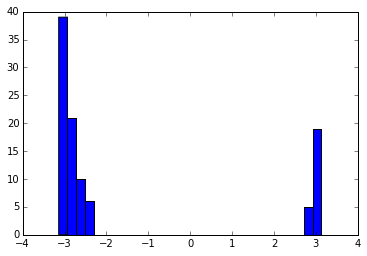

In [61]:
plt.hist(DFG_Abl_sim.cv(new_traj),bins=30)

In [60]:
DFG_Abl_sim.cv(traj)

array([-2.95457983, -2.48958588, -2.38155031, -2.8764081 ], dtype=float32)

In [63]:
this_guy_new = new_traj.md()
this_guy_new.save_pdb('test_new.pdb')

In [55]:
for snape in new_traj:
    print snape.configuration.potential_energy

-5146.38818359 kJ/mol
-6606.07228017 kJ/mol
-8930.3606075 kJ/mol
-8834.53957152 kJ/mol
-11579.7049888 kJ/mol
-11221.764262 kJ/mol
-12953.081526 kJ/mol
-13826.139956 kJ/mol
-14618.0732296 kJ/mol
-14591.8066841 kJ/mol
-15522.031733 kJ/mol
-15935.5231831 kJ/mol
-16506.9276384 kJ/mol
-16732.3305302 kJ/mol
-17302.9324847 kJ/mol
-17595.4222009 kJ/mol
-17610.3551219 kJ/mol
-18028.0139019 kJ/mol
-18069.8872821 kJ/mol
-18625.9548802 kJ/mol
-18804.8233001 kJ/mol
-19102.9113224 kJ/mol
-19167.171665 kJ/mol
-19245.1592152 kJ/mol
-19250.3079567 kJ/mol
-19331.4790807 kJ/mol
-19754.1349683 kJ/mol
-19921.2905104 kJ/mol
-19980.4351958 kJ/mol
-20084.1562607 kJ/mol
-20115.3755853 kJ/mol
-20060.1441486 kJ/mol
-20320.5213156 kJ/mol
-20318.6018555 kJ/mol
-20437.9819694 kJ/mol
-20936.2768395 kJ/mol
-20884.9073797 kJ/mol
-20792.9227786 kJ/mol
-21010.7570891 kJ/mol
-20765.3476698 kJ/mol
-20677.1932453 kJ/mol
-21048.1849444 kJ/mol
-20943.7676258 kJ/mol
-20962.5588179 kJ/mol
-21094.173888 kJ/mol
-20972.6762211 kJ

In [18]:
for atom in DFG_Abl_sim.storage.trajectories[ntraj-1][-1].xyz:
    print atom

[ 2.19611216  2.65664244  4.8779788 ]
[ 2.22645354  2.62408018  4.96864319]
[ 2.10395312  2.69553471  4.89194727]
[ 2.19173241  2.58683133  4.80512094]
[ 2.28928256  2.76902437  4.83580351]
[ 2.28606653  2.81035781  4.73499584]
[ 2.27626014  2.89468122  4.93328238]
[ 2.18973279  2.955019    4.9058342 ]
[ 2.3651576   3.01483655  4.90947628]
[ 2.46740389  2.98770809  4.88319302]
[ 2.35607481  3.09044027  4.98746729]
[ 2.29144502  2.85583806  5.07380342]
[ 2.20209336  2.80528545  5.11043215]
[ 2.38286448  2.79695988  5.0813427 ]
[ 2.29820919  2.93665242  5.14663363]
[ 2.32896733  3.10282874  4.77988052]
[ 2.33799005  3.0373652   4.69319677]
[ 2.22558427  3.13634109  4.78824043]
[ 2.36426997  3.20551133  4.78942013]
[ 2.44479775  2.70636296  4.83176041]
[ 2.47722268  2.63857937  4.91568422]
[ 2.53405714  2.75843406  4.73748398]
[ 2.50379848  2.82750988  4.67029858]
[ 2.67419267  2.7143383   4.72051191]
[ 2.68526673  2.64957905  4.80748653]
[ 2.67258668  2.62489319  4.59285975]
[ 2.64715457

In [8]:
for t in DFG_Abl_sim.storage.trajectories:
    print DFG_Abl_sim.cv(t)

[-2.76348162 -2.59951782 -2.77396774]
[-2.76348162 -2.59951782 -2.62037253]
[-2.7520535  -2.59951782 -2.62037253]
[-2.7520535  -2.59951782 -2.69660354]
[-2.75359488 -2.59951782 -2.69660354]
[-2.73804355 -2.59951782 -2.69660354]
[-2.83547497 -2.59951782 -2.69660354]
[-2.82898021 -2.59951782 -2.69660354]
[-2.82898021 -2.59951782 -2.78426147]
[-2.82898021 -2.59951782 -2.7367754 ]
[-2.80098939 -2.59951782 -2.7367754 ]
[-2.80098939 -2.59951782 -2.56915998 -3.03691959]
[-2.82435274 -2.59951782 -2.56915998 -3.03691959]
[-2.6141715  -2.56915998 -3.03691959]
[-2.66507268 -2.56915998 -3.03691959]
[-2.66507268 -2.56915998 -2.78607082]
[-2.66507268 -2.56915998 -3.02113271]
[-2.8132422  -2.59013844 -2.56915998 -3.02113271]
[-2.8132422  -2.59013844 -2.6570878 ]
[-2.8132422  -2.59013844 -2.48209453 -2.87685847]
[-2.8132422  -2.59013844 -2.48209453 -2.94303894]
[-2.7961309  -2.59013844 -2.48209453 -2.94303894]
[-2.7961309  -2.59013844 -2.573838   -2.94368553]
[-2.79181767 -2.59013844 -2.48209453 -2.94

In [ ]:
import mdtraj as md
mtraj = md.load("sim-snippets/dozen_frames_abl.xtc", top="sim-snippets/abl_ref.pdb")

In [ ]:
len(mtraj)

In [ ]:
ops_traj = paths.Trajectory.from_mdtraj(mtraj)

In [ ]:
for frame in ops_traj:
    frame.configuration.topology = DFG_Abl_sim.engine.topology

In [ ]:
DFG_Abl_sim.cv(ops_traj)

In [82]:
import openpathsampling.visualize as visualizations
reload(visualizations)
from IPython.display import SVG

history = visualizations.ReplicaHistoryTree(
    storage=DFG_Abl_sim.storage,
    steps=DFG_Abl_sim.storage.steps[:],
    replica=1
)

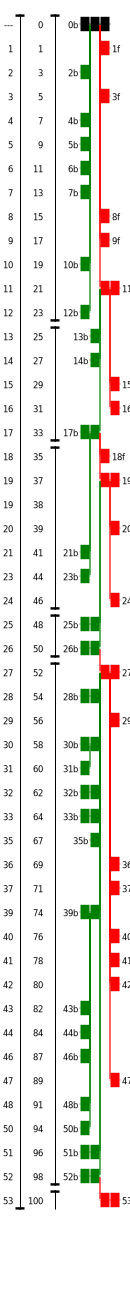

In [83]:
history.view.zoom = 1.0
history.view.scale_y = 24
history.view.scale_x = 10
history.view.font_size = 0.35
history.view.horizontal_gap = 0.05

SVG(history.view.to_svg())

In [84]:
decorrelated = history.decorrelated_trajectories
print "We have " + str(len(decorrelated)) + " decorrelated trajectories."

We have 6 decorrelated trajectories.
